## Productizing Recommendations Charts

### Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Patch
import seaborn as sns
import streamlit as st
%matplotlib inline

In [ ]:
player_percentiles = pd.read_csv('../../outputs/player_playtypes_percentiles_2015_2024.csv')
player_percentiles_2024 = player_percentiles[player_percentiles['SeasonYear'] == '2024-25']

In [ ]:
playtype_data = pd.read_csv('../../outputs/playtype_data_2015_2024.csv')
# Group by PLAY_TYPE and TYPE_GROUPING, then sum the POSS column
playtype_summary = playtype_data.groupby(['PLAY_TYPE', 'TYPE_GROUPING'])['POSS'].sum().reset_index()
# Rename the summed column for clarity
playtype_summary.rename(columns={'POSS': 'Total_POSS'}, inplace=True)
playtype_summary['ATTR_NAME'] = playtype_summary['TYPE_GROUPING'] + '_' + playtype_summary['PLAY_TYPE']
top_play = playtype_summary['Total_POSS'].max()
playtype_summary['Frequency'] = (playtype_summary['Total_POSS'] / top_play) * 100

In [5]:
attributes_bigs = ['Defensive_PRBallHandler', 'Defensive_OffScreen', 'Defensive_PRRollMan', 'Offensive_Cut']
attributes_wings = ['Offensive_Postup', 'Offensive_Spotup', 'Offensive_OffScreen', 'Defensive_Handoff']

In [10]:
def plot_player_comparison(players, skill_columns):
        # Create 2x2 subplot grid
    fig, axs = plt.subplots(2, 2, figsize=(16, 12))
    axs = axs.flatten()  # Flatten 2D array to 1D list for easy looping

    # Build a dictionary for quick lookup of global frequencies
    frequency_map = dict(zip(playtype_summary['ATTR_NAME'], playtype_summary['Frequency']))

    for i, player in enumerate(players):
        ax = axs[i]
        try:
            # Get player percentile data
            player_data = player_percentiles_2024[player_percentiles_2024['PLAYER_NAME'] == player].iloc[0]
            percentiles = [player_data[attr] * 100 for attr in skill_columns]

            # Get frequency data for each attribute (same for all players)
            player_freqs = [frequency_map.get(attr, 0) for attr in skill_columns]

            # Bar positions
            x = np.arange(len(skill_columns))
            bar_width = 0.35

            # Plot percentile and frequency bars
            ax.bar(x - bar_width/2, percentiles, width=bar_width, color='lemonchiffon', label='Percentile')
            ax.bar(x + bar_width/2, player_freqs, width=bar_width, color='plum', label='Frequency')

            # Clean visual style
            ax.set_xticks(x)
            ax.set_xticklabels([attr.replace('_', '\n') for attr in skill_columns], rotation=0, ha='center')
            ax.set_ylim(0, 100)
            ax.set_title(f"{player}", fontsize=16)

            # Faint gridlines and no border
            ax.grid(True, which='both', axis='both', linestyle='--', color='lightgray', alpha=0.7)
            for spine in ['top', 'right', 'left', 'bottom']:
                ax.spines[spine].set_visible(False)

            # Add legend only to the first plot
            if i == 0:
                legend_elements = [
                    Patch(facecolor='lemonchiffon', label='Percentile'),
                    Patch(facecolor='plum', label='Frequency')
                ]
                ax.legend(handles=legend_elements, loc='upper left')

            # Add player image in slightly adjusted position
            image_path = f'../images/{player.lower().replace(" ", "_")}.png'
            try:
                img = mpimg.imread(image_path)
                img_ax = fig.add_axes([
                    ax.get_position().x1 - 0.07,  # moved slightly more right
                    ax.get_position().y1 - 0.12,
                    0.1, 0.1
                ])
                img_ax.imshow(img)
                img_ax.axis('off')
            except FileNotFoundError:
                print(f"Image not found for {player}: {image_path}")

        except IndexError:
            print(f"No data found for {player}")
            ax.set_visible(False)

    # Final layout
    fig.suptitle("Key Attribute Percentiles and Frequencies – Select Players", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

In [12]:
user_input = input("Enter players separated by comma: ")
players_to_compare = [x.strip() for x in user_input.split(',')]

Enter players separated by comma: Jarred Vanderbilt, Bobby Portis, Mouhamed Gueye, Anthony Davis


Image not found for Jarred Vanderbilt: ../images/jarred_vanderbilt.png
Image not found for Anthony Davis: ../images/anthony_davis.png


C:\Users\kevin\AppData\Local\Temp\ipykernel_2732\3012607998.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


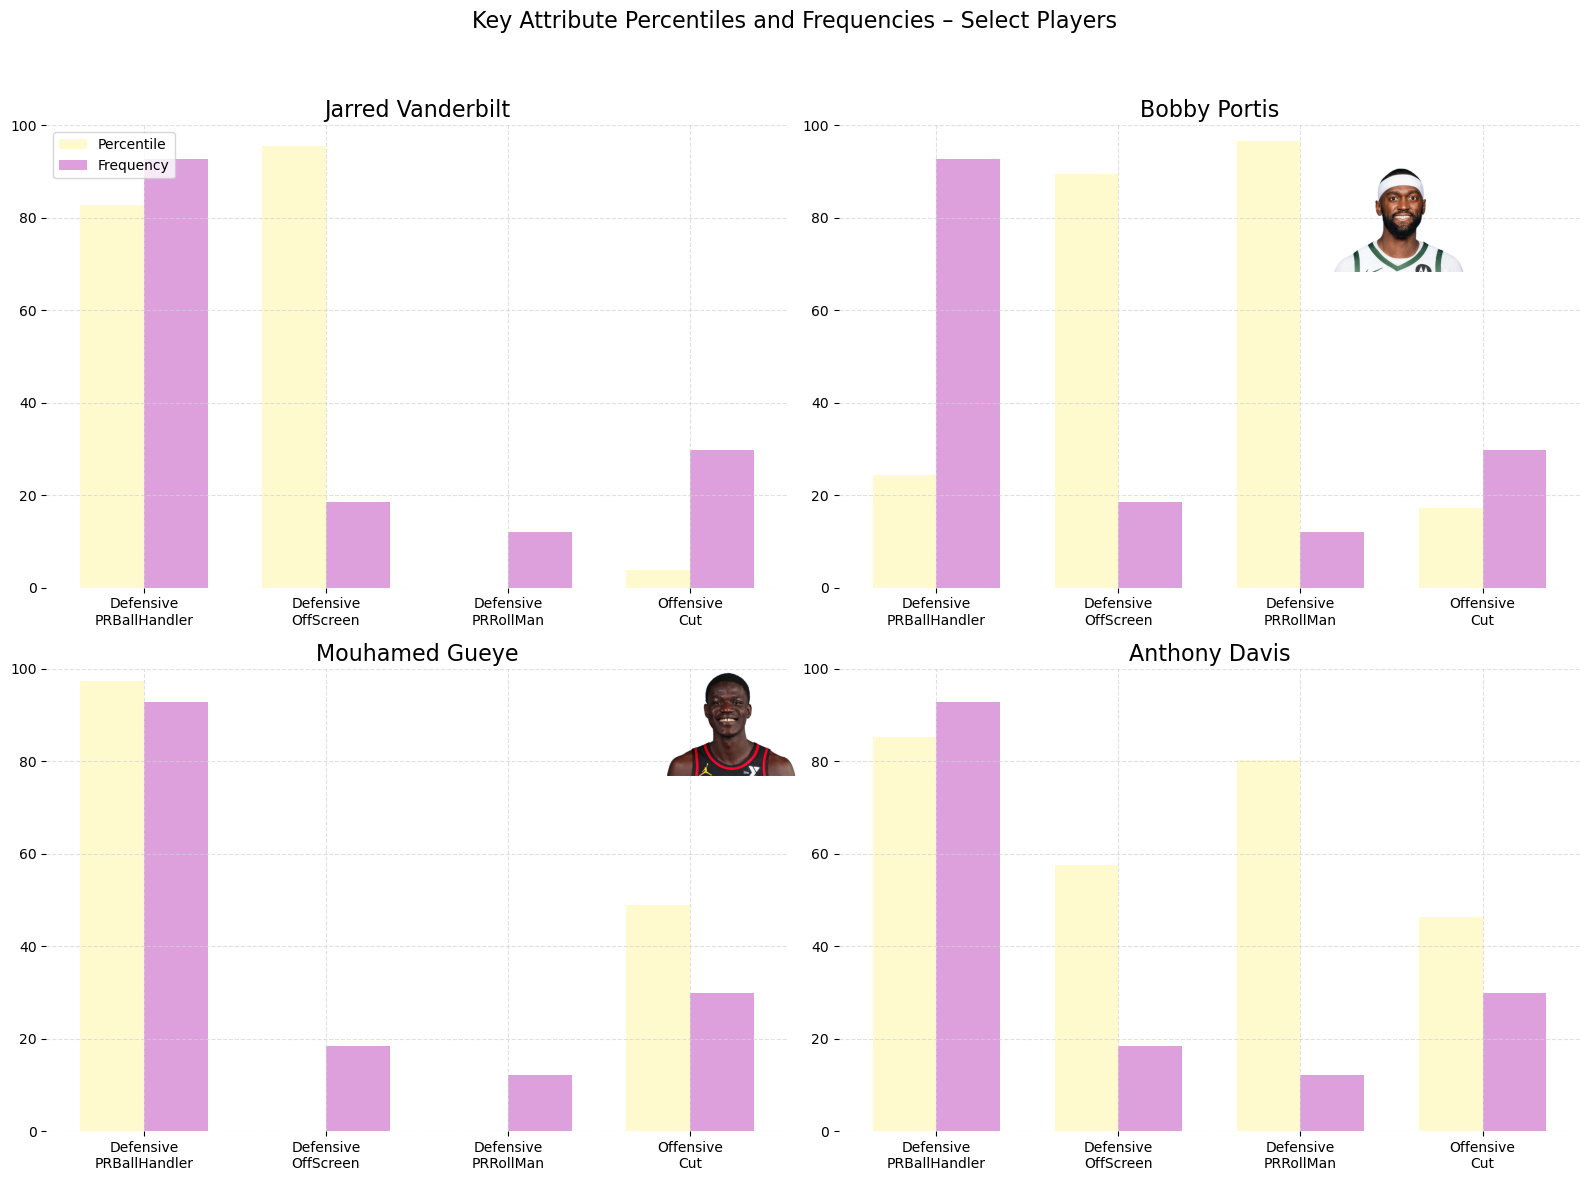

In [13]:
plot_player_comparison(players_to_compare, attributes_bigs)

In [14]:
st.title("Lakers Target Fit Explorer")

# Allow user to select players dynamically
player_options = player_percentiles_2024['PLAYER_NAME'].unique()
players_to_compare = st.multiselect("Select players to compare:", options=player_options)

if players_to_compare:
    data = player_percentiles_2024[player_percentiles_2024['PLAYER_NAME'].isin(players_to_compare)]
    data = data.set_index('PLAYER_NAME')[attributes_bigs]
    data_norm = (data - data.min()) / (data.max() - data.min())
    
    st.subheader("Skill Comparison")
    # st.bar_chart(data_norm)
    
    fig, ax = plt.subplots(figsize=(12, 6))
    subset_norm.T.plot(kind='bar', ax=ax, width=0.8, color=sns.color_palette("Set2"))
    plt.title("Teammate Skill Fit Comparison (LeBron/Luka Model Framework)", fontsize=16)
    plt.ylabel("Normalized Skill Value", fontsize=12)
    plt.xlabel("Key Skill Attributes", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1.1)
    plt.legend(title='Player', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    st.pyplot(fig)

2025-07-08 18:30:44.944 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-08 18:30:45.564 
  command:

    streamlit run C:\Users\kevin\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-07-08 18:30:45.564 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-08 18:30:45.584 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-08 18:30:45.590 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-08 18:30:45.611 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-08 18:30:45.611 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-08 18:30:45.623 Thread 'MainThread': mi